# Automobile EDA

In [1]:
# Import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the automobile dataset
try:
    automobile_df = pd.read_csv("automobile.txt")
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: The file 'automobile.txt' was not found.")
    automobile_df = pd.DataFrame()

# Display the first few rows of the DataFrame if it is not empty
if not automobile_df.empty:
    display(automobile_df.head())
else:
    print("DataFrame is empty. Please check the file path and try again.")


Dataset loaded successfully!


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Data Cleansing
#### Clean the data

I have chosen to remove the following columns:

normalized-losses: This column contains many missing values ('?' in the dataset), it might be redundant.

engine-location: Most vehicles have the engine in the front. If there is little variation, this column might not add much value.

bore, stroke, compression-ratio, peak-rpm: These are very specific and technical for the specific analysis I will be performing. They might not add much value for my analysis.

In [3]:
# Remove redundant or unnecessary columns
columns_to_drop = [
    'normalized-losses', 'engine-location', 'bore', 'stroke', 
    'compression-ratio', 'peak-rpm'
]
automobile_df.drop(columns=columns_to_drop, inplace=True)

# Display the first few rows of the transformed DataFrame
display(automobile_df.head())


,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,horsepower,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,111,21,27,13495
1,3,alfa-romero,gas,std,two,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,111,21,27,16500
2,1,alfa-romero,gas,std,two,hatchback,rwd,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,154,19,26,16500
3,2,audi,gas,std,four,sedan,fwd,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,102,24,30,13950
4,2,audi,gas,std,four,sedan,4wd,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,115,18,22,17450


#### Remove any duplicate rows

There are no duplicate rows in the DataFrame. 

In [4]:
# Number of rows before removing duplicates
initial_row_count = automobile_df.shape[0]
print(f"Number of rows in dataset: {initial_row_count}")

# Identify duplicate rows
duplicates = automobile_df[automobile_df.duplicated()]

# Display the duplicate rows
display(duplicates)

# Print the number of duplicate rows
print(f"Number of duplicate rows: {len(duplicates)}")


Number of rows in dataset: 205


,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,horsepower,city-mpg,highway-mpg,price


Number of duplicate rows: 0


#### Remove rows with missing data 

Remove any rows with "?" entries.

In [5]:
# Display rows with missing data
missing_data_rows = automobile_df[automobile_df.isna().any(axis=1)]
display(missing_data_rows)
print(f"Number of rows with NA data: {len(missing_data_rows)}")

# Display rows containing "?" in any column
question_mark_rows = automobile_df[automobile_df.isin(['?']).any(axis=1)]
display(question_mark_rows)
print(f"Number of rows with '?' data: {len(question_mark_rows)}")

# Directly drop rows containing "?"
automobile_df = automobile_df[~automobile_df.isin(['?']).any(axis=1)]

# Get the final number of rows after cleaning the data
final_row_count = automobile_df.shape[0]
print(f"Number of rows after removing missing data and '?': {final_row_count}")


,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,horsepower,city-mpg,highway-mpg,price


Number of rows with NA data: 0


,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,horsepower,city-mpg,highway-mpg,price
9,0,audi,gas,turbo,two,hatchback,4wd,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,160,16,22,?
27,1,dodge,gas,turbo,?,sedan,fwd,93.7,157.3,63.8,50.6,2191,ohc,four,98,mpfi,102,24,30,8558
44,1,isuzu,gas,std,two,sedan,fwd,94.5,155.9,63.6,52.0,1874,ohc,four,90,2bbl,70,38,43,?
45,0,isuzu,gas,std,four,sedan,fwd,94.5,155.9,63.6,52.0,1909,ohc,four,90,2bbl,70,38,43,?
63,0,mazda,diesel,std,?,sedan,fwd,98.8,177.8,66.5,55.5,2443,ohc,four,122,idi,64,36,42,10795
129,1,porsche,gas,std,two,hatchback,rwd,98.4,175.7,72.3,50.5,3366,dohcv,eight,203,mpfi,288,17,28,?
130,0,renault,gas,std,four,wagon,fwd,96.1,181.5,66.5,55.2,2579,ohc,four,132,mpfi,?,23,31,9295
131,2,renault,gas,std,two,hatchback,fwd,96.1,176.8,66.6,50.5,2460,ohc,four,132,mpfi,?,23,31,9895


Number of rows with '?' data: 8
Number of rows after removing missing data and '?': 197


#### Change data types

horsepower and price: Contains integer values but are within inverted commas making them string inputs and thus objects. This can be converted to integer values.

fuel-type: Contains values like gas and diesel, convert to binary.

aspiration: It contains values like std and turbo, convert to binary.

num-of-doors: It contains values like two and four, convert to binary.



In [6]:
# Display the data types of all columns
print("\nData types of all columns:")
print(automobile_df.dtypes)

for column in automobile_df.columns:
    unique_values = automobile_df[column].unique()
    print(f"\nColumn: {column}, Unique Values: {unique_values}")



Data types of all columns:
symboling             int64
make                 object
fuel-type            object
aspiration           object
num-of-doors         object
body-style           object
drive-wheels         object
wheel-base          float64
length              float64
width               float64
height              float64
curb-weight           int64
engine-type          object
num-of-cylinders     object
engine-size           int64
fuel-system          object
horsepower           object
city-mpg              int64
highway-mpg           int64
price                object
dtype: object

Column: symboling, Unique Values: [ 3  1  2  0 -1 -2]

Column: make, Unique Values: ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']

Column: fuel-type, Unique Values: ['gas' 'diesel']

Column: aspiration, Unique Values: ['std' 'turbo']



In [7]:
# Convert the columns to integer datatype
automobile_df['horsepower'] = automobile_df['horsepower'].astype(int)
automobile_df['price'] = automobile_df['price'].astype(int)

# Convert 'fuel-type' to binary
automobile_df['fuel-type'] = automobile_df['fuel-type'].map({'gas': 1, 'diesel': 0})

# Convert 'aspiration' to binary
automobile_df['aspiration'] = automobile_df['aspiration'].map({'std': 1, 'turbo': 0})

# Convert 'num-of-doors' to binary
automobile_df['num-of-doors'] = automobile_df['num-of-doors'].map({'two': 1, 'four': 0})

display(automobile_df.head())


,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,horsepower,city-mpg,highway-mpg,price
0,3,alfa-romero,1,1,1,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,111,21,27,13495
1,3,alfa-romero,1,1,1,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,111,21,27,16500
2,1,alfa-romero,1,1,1,hatchback,rwd,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,154,19,26,16500
3,2,audi,1,1,0,sedan,fwd,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,102,24,30,13950
4,2,audi,1,1,0,sedan,4wd,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,115,18,22,17450


In [8]:
# Display the data types of all columns after changes
print("\nData types of all columns after changes:")
print(automobile_df.dtypes)



Data types of all columns after changes:
symboling             int64
make                 object
fuel-type             int64
aspiration            int64
num-of-doors          int64
body-style           object
drive-wheels         object
wheel-base          float64
length              float64
width               float64
height              float64
curb-weight           int64
engine-type          object
num-of-cylinders     object
engine-size           int64
fuel-system          object
horsepower            int32
city-mpg              int64
highway-mpg           int64
price                 int32
dtype: object


### Now onto the exploration

#### Identify relationships between variables (features)

### Finding Certain Makes
Display each car make and the amount of each in the dataset. 

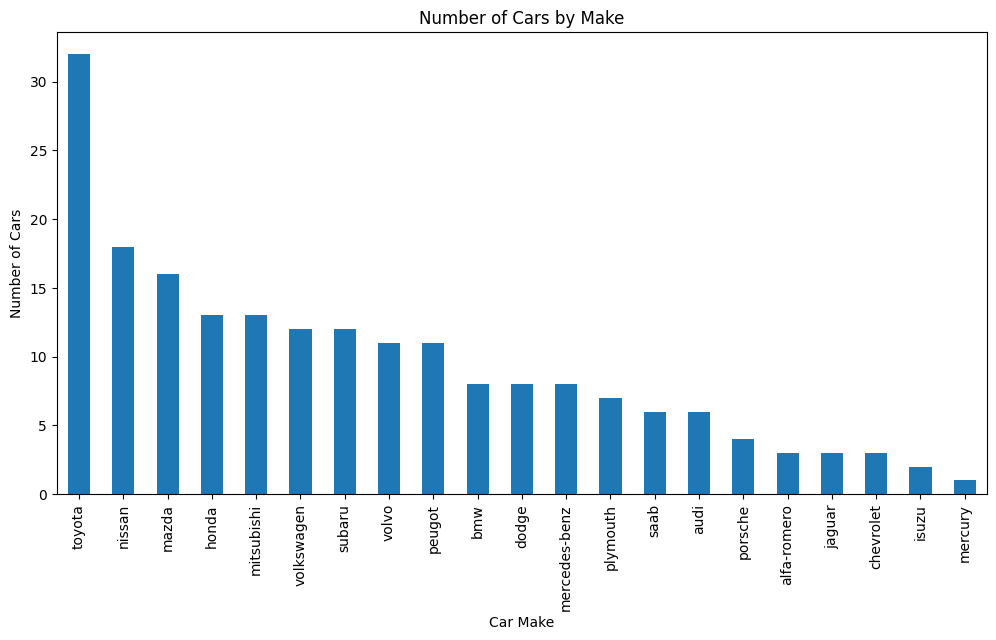

In [9]:
# Count the number of occurrences for each car make
car_make_counts = automobile_df['make'].value_counts()

# Create a bar plot
plt.figure(figsize=(12, 6))
car_make_counts.plot(kind='bar')

# Set the title and labels
plt.title('Number of Cars by Make')
plt.xlabel('Car Make')
plt.ylabel('Number of Cars')

# Show the plot
plt.show()


#### Which are the 5 most expensive cars? 

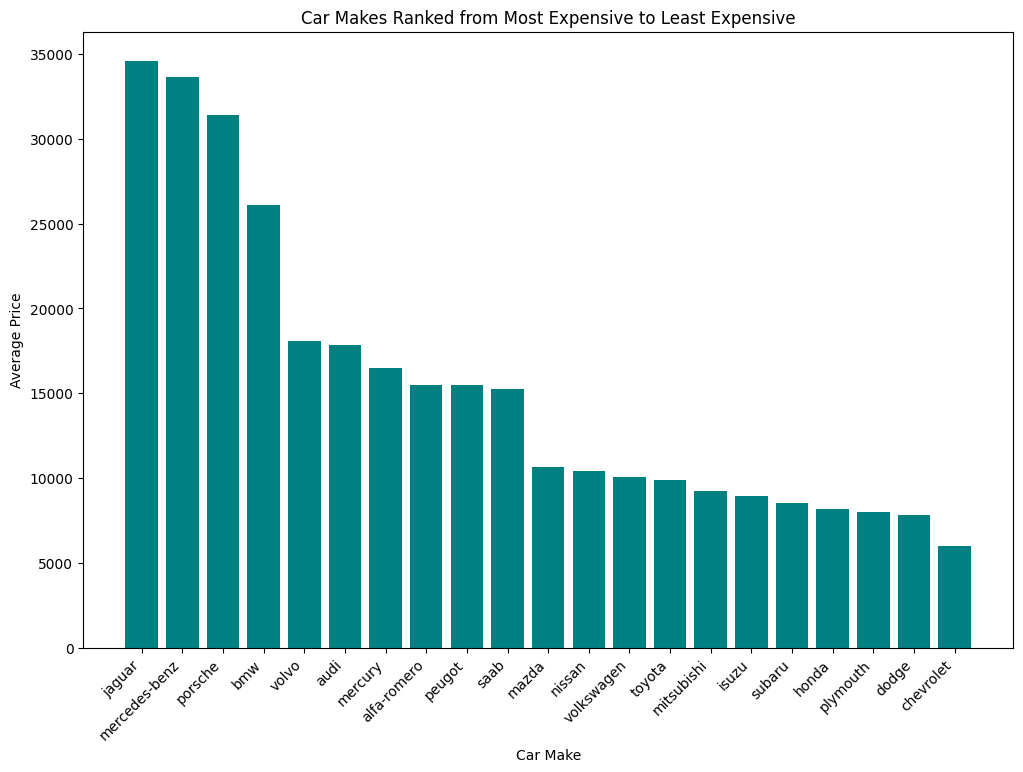

In [10]:
# Calculate the average price for each car make
average_price_by_make = automobile_df.groupby('make')['price'].mean()

# Sort the car makes by average price in descending order
average_price_by_make_sorted = average_price_by_make.sort_values(ascending=False)

# Create a bar plot for car makes ranked from most expensive to least expensive
plt.figure(figsize=(12, 8))
plt.bar(average_price_by_make_sorted.index, average_price_by_make_sorted.values, color='teal')

# Set the title and labels
plt.title('Car Makes Ranked from Most Expensive to Least Expensive')
plt.xlabel('Car Make')
plt.ylabel('Average Price')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

#### How do car prices range?

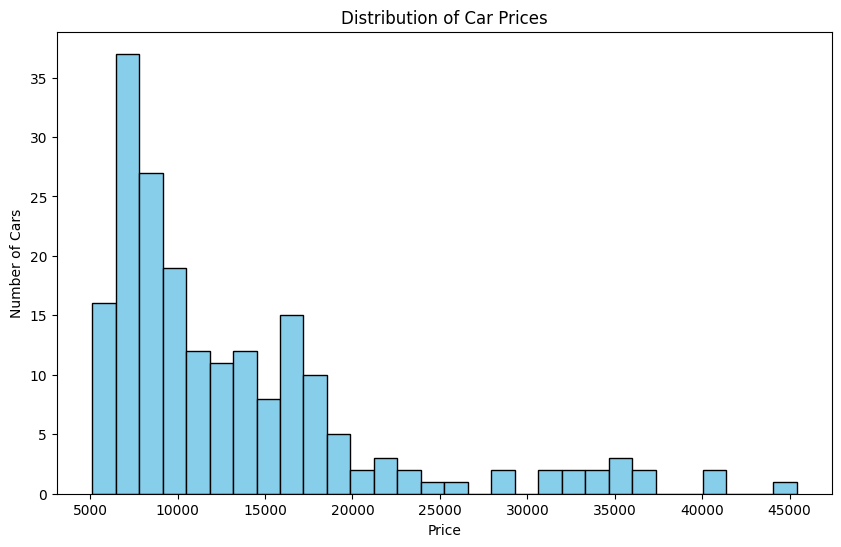

In [11]:
# Create a histogram for car prices
plt.figure(figsize=(10, 6))
plt.hist(automobile_df['price'], bins=30, color='skyblue', edgecolor='black')

# Set the title and labels
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Number of Cars')

# Show the plot
plt.show()


#### What is the car price by make?

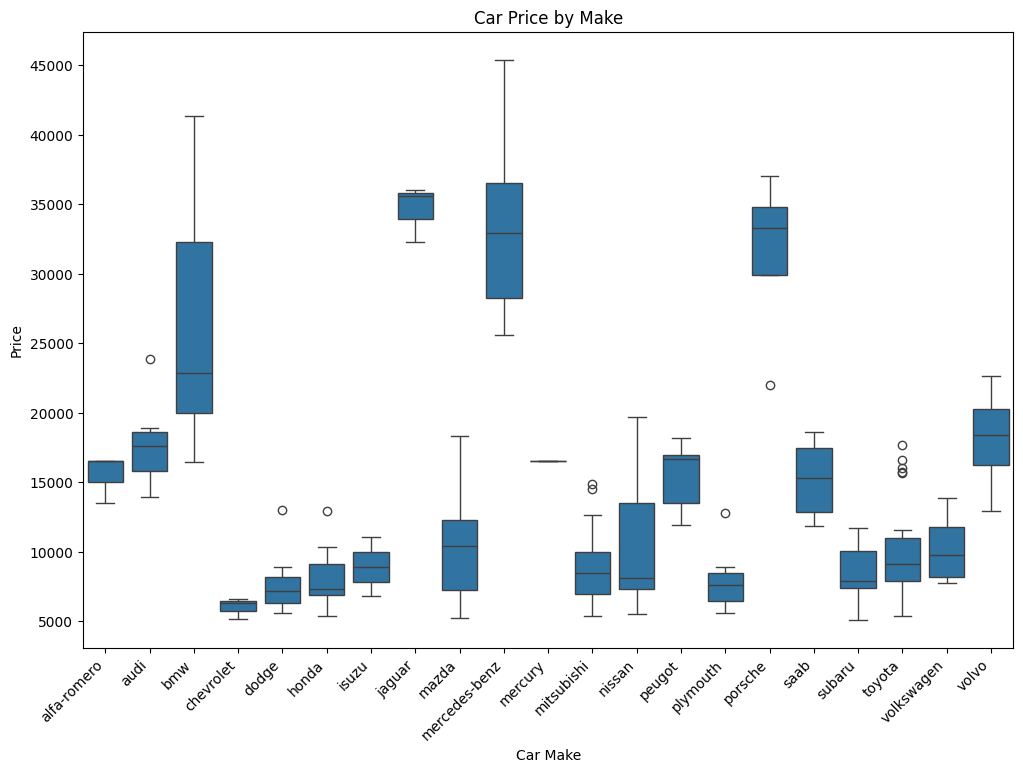

In [12]:
# Set the size of the figure
plt.figure(figsize=(12, 8))

# Create a boxplot for car prices by make
sns.boxplot(x='make', y='price', data=automobile_df)

# Set the title and labels
plt.title('Car Price by Make')
plt.xlabel('Car Make')
plt.ylabel('Price')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


#### What is the distribution of fuel type?

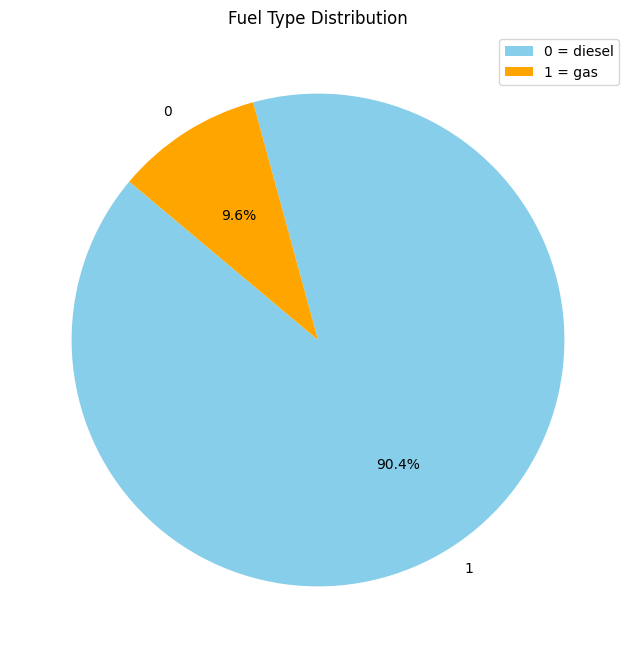

In [13]:
# Count the number of occurrences for each fuel type
fuel_type_counts = automobile_df['fuel-type'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(fuel_type_counts, labels=fuel_type_counts.index, autopct='%1.1f%%', colors=['skyblue', 'orange'], startangle=140)

# Set the title
plt.title('Fuel Type Distribution')

# Add a legend explaining the binary encoding
plt.legend(['0 = diesel', '1 = gas'], loc='upper right')

# Show the plot
plt.show()


#### What is the relationship between engine size and horsepower?

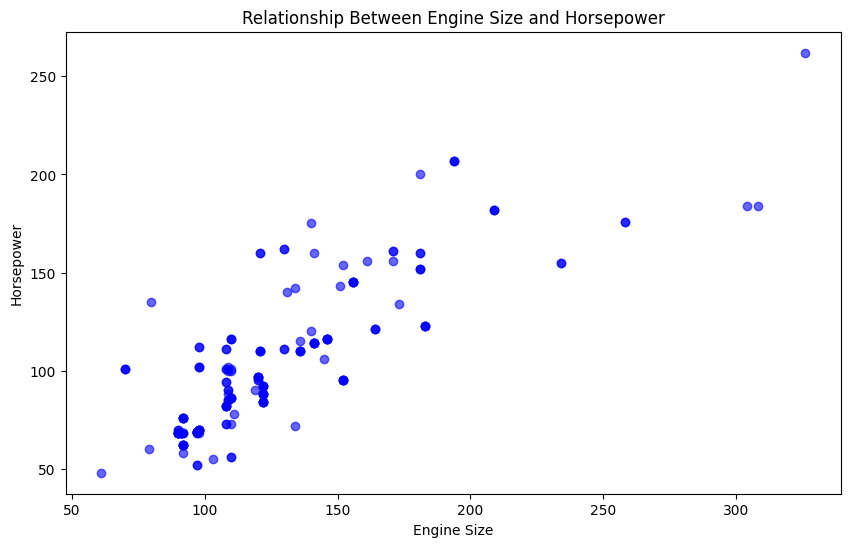

In [14]:
# Create a scatter plot to show the relationship between engine size and horsepower
plt.figure(figsize=(10, 6))
plt.scatter(automobile_df['engine-size'], automobile_df['horsepower'], color='blue', alpha=0.6)

# Set the title and labels
plt.title('Relationship Between Engine Size and Horsepower')
plt.xlabel('Engine Size')
plt.ylabel('Horsepower')

# Show the plot
plt.show()


#### How many cars are there in each car body style?

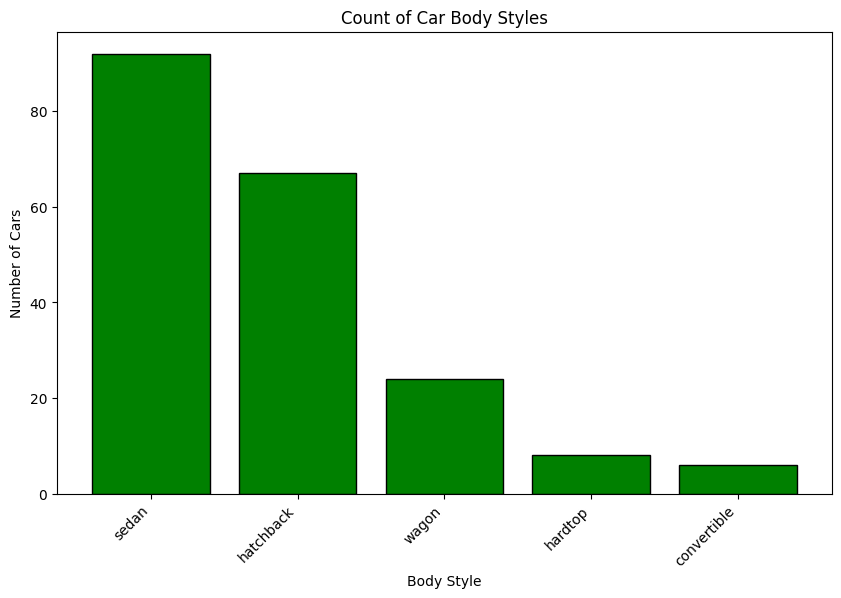

In [15]:
# Count the number of occurrences for each body style
body_style_counts = automobile_df['body-style'].value_counts()

# Create a bar chart for car body styles
plt.figure(figsize=(10, 6))
plt.bar(body_style_counts.index, body_style_counts.values, color='green', edgecolor='black')

# Set the title and labels
plt.title('Count of Car Body Styles')
plt.xlabel('Body Style')
plt.ylabel('Number of Cars')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


#### What is the average price of a car based on body style?

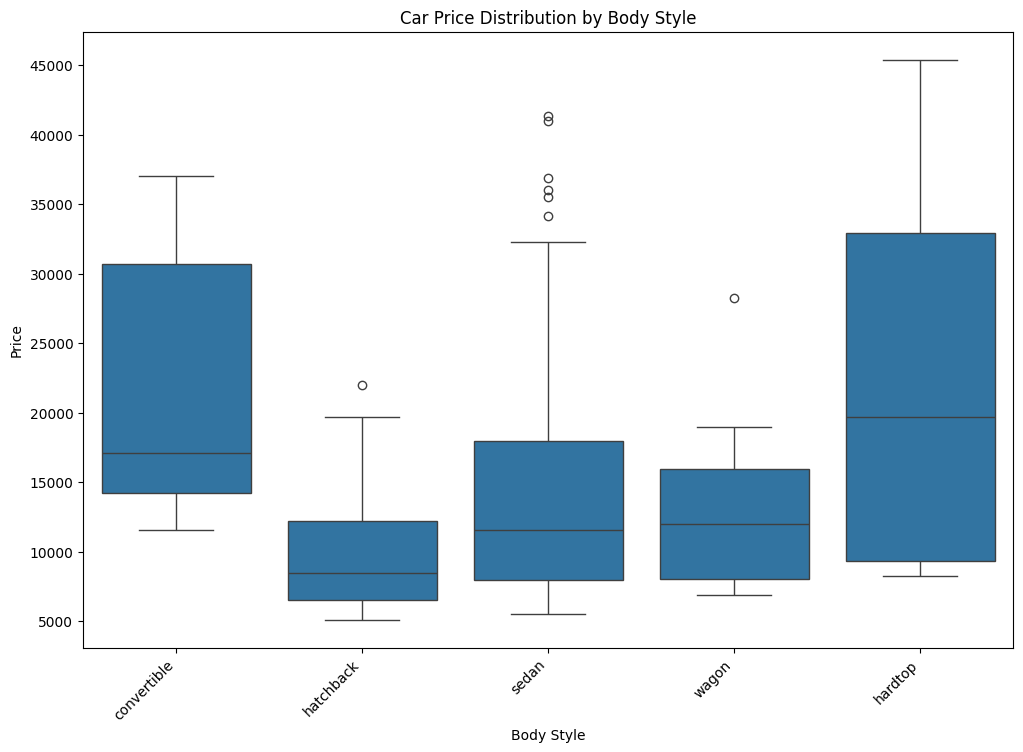

In [16]:
# Set the size of the figure
plt.figure(figsize=(12, 8))

# Create a box plot for car prices by body style
sns.boxplot(x='body-style', y='price', data=automobile_df)

# Set the title and labels
plt.title('Car Price Distribution by Body Style')
plt.xlabel('Body Style')
plt.ylabel('Price')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


#### What is the relationship between wheelbase and car length?

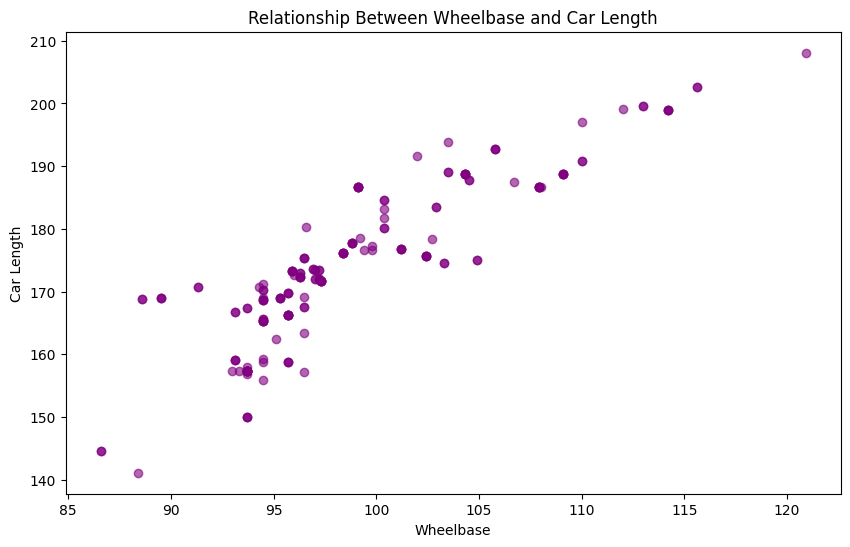

In [17]:
# Create a scatter plot to show the relationship between wheelbase and car length
plt.figure(figsize=(10, 6))
plt.scatter(automobile_df['wheel-base'], automobile_df['length'], color='purple', alpha=0.6)

# Set the title and labels
plt.title('Relationship Between Wheelbase and Car Length')
plt.xlabel('Wheelbase')
plt.ylabel('Car Length')

# Show the plot
plt.show()


#### How does the number of doors affect the price of the car?

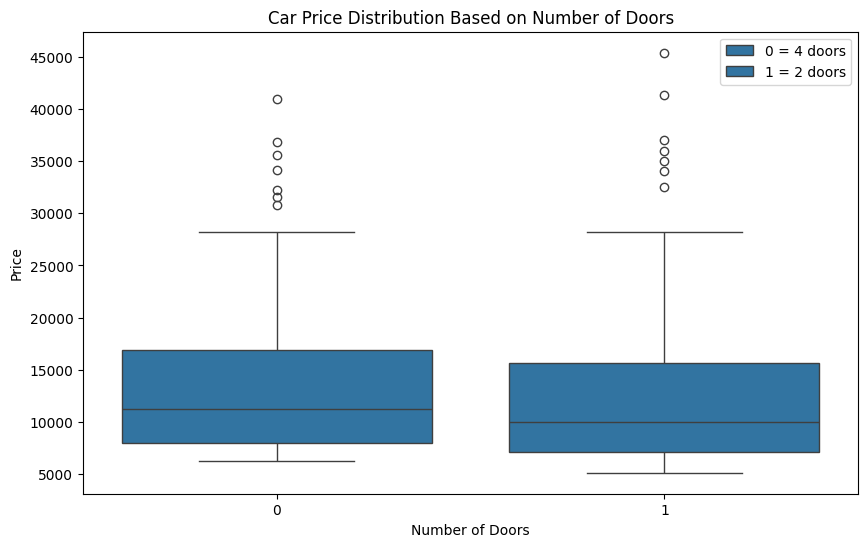

In [18]:
# Set the size of the figure
plt.figure(figsize=(10, 6))

# Create a box plot for car prices based on the number of doors
sns.boxplot(x='num-of-doors', y='price', data=automobile_df)

# Set the title and labels
plt.title('Car Price Distribution Based on Number of Doors')
plt.xlabel('Number of Doors')
plt.ylabel('Price')

# Add a legend explaining the binary encoding
plt.legend(['0 = 4 doors', '1 = 2 doors'], loc='upper right')

# Show the plot
plt.show()


#### References:

https://www.reddit.com/r/analytics/comments/14haq0p/exploratory_data_analysis_things_to_look_for/

https://dovetail.com/market-research/market-trends/#:~:text=Market%20trends%20are%20movements%20in,or%20positive%20way%20for%20business.

https://www.autodesk.com/design-make/articles/automotive-industry-trends

https://www.carlogos.org/japanese-car-brands/#:~:text=Japanese%20car%20brands%20include%20Toyota,for%20its%20luxury%20car%20brands.

https://matplotlib.org/stable/gallery/color/named_colors.html

https://www.geeksforgeeks.org/python-pandas-index-value_counts/

https://www.newroadsgm.com/difference-between-fwd-rwd-awd-4wd/

https://stackoverflow.com/questions/956969/difference-between-print-and-display

https://www.pineapple.co.za/post/8-things-to-consider-when-buying-a-car

https://businesstech.co.za/news/motoring/761653/what-to-consider-before-buying-a-car-in-south-africa/

https://www.sciencedirect.com/topics/engineering/compression-ratio#:~:text=Compression%20ratio%20(CR)%20is%20a,(3).&text=CR%20can%20be%20used%20to,higher%20CR%20means%20better%20compression.

https://primesourceco.com/latest-news/the-difference-between-a-2-stroke-and-4-stroke-engine/#:~:text=A%20stroke%20is%20when%20the,opens%20to%20expel%20the%20exhaust.

https://www.oponeo.co.uk/blog/hub-diameter-wheel-central-bore-and-spigot-rings#:~:text=The%20centre%20bore%20should%20not,the%20wheel%20to%20the%20hub.

https://www.godigit.com/motor-insurance/car-insurance/car-parts/what-is-rpm-in-cars#:~:text=RPM%20in%20cars%20is%20all,denote%20a%20car's%20performance%20specs.

https://www.dcc.fc.up.pt/~ltorgo/Regression/price.html#:~:text=Cars%20are%20initially%20assigned%20a,it%20is%20probably%20pretty%20safe.

https://www.programiz.com/python-programming/operators